/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

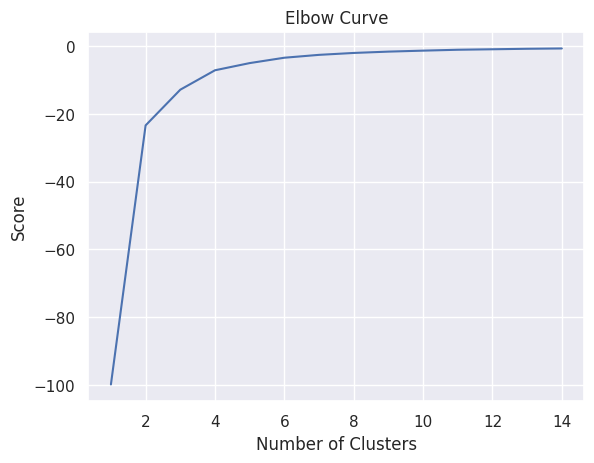

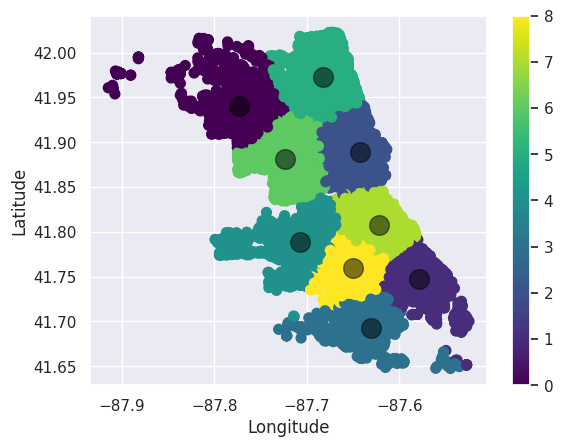

In [9]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# read the crime data from csv file
data_url = "2020_crimes.csv"
crime_data = pd.read_csv(data_url)

# extract latitude and longitude coordinates
coordinates = crime_data.loc[:,['Latitude','Longitude']]

# specify the range of clusters to test
clusters = range(1,15)

# create KMeans models with different number of clusters
kmeans_models = [KMeans(n_clusters=i) for i in clusters]

# compute score for each model and store in a list
latitudes = crime_data[['Latitude']]
longitudes = crime_data[['Longitude']]
scores = [kmeans_models[i].fit(latitudes).score(latitudes) for i in range(len(kmeans_models))]

# plot the elbow curve to determine the optimal number of clusters
plt.plot(clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
# plt.show()

# use the optimal number of clusters to fit the KMeans model
kmeans_model = KMeans(n_clusters=9, init='k-means++')
kmeans_model.fit(coordinates)

# add cluster labels to the coordinates dataframe
coordinates['cluster_label'] = kmeans_model.fit_predict(coordinates)

# get the coordinates of the cluster centers and the predicted labels for each data point
cluster_centers = kmeans_model.cluster_centers_
cluster_labels = kmeans_model.predict(coordinates[coordinates.columns[0:2]])

# plot the data points with cluster labels and the cluster centers
coordinates.plot.scatter(x='Longitude', y='Latitude', c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='black', s=200, alpha=0.5)